In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import shuffle
from tqdm import tqdm
import pickle
import os
import cv2
import timeit

<p style="font-size:20px">In Problem 4a, you will preprocess the dogs and cats data and save them into "Pickle" files for later use.

In [2]:
train_dir = '/home/lkumari/data/dogs-vs-cats/train/train/'
test_dir = '/home/lkumari/data/dogs-vs-cats/test1/test1/'

<p style="font-size:20px">Step 1: Kaggle does not provide a file that contains the labels. So we need to create labels from the training file.

In [3]:
"""
a function to return the label of a image
input: 
    image
return:
    if the image is cat, return [1,0]
    if the image is dog, return [0,1]
"""
# img here is the path of the image file
def label_img(img):
    lastToken = img.split('/')[-1]
    if lastToken.startswith('cat'):
        return [1,0]
    else:
        return [0,1]

<p style="font-size:20px">Step 2: define a function to fetch all images from the training directory and return a <b>list</b> that every element contains two <b>Numpy array</b>:image and its label.

In [4]:
"""
Hint 1: use tqdm to fetch file
    for file in tqdm(os.listdir(directory)):
        ...

Hint 2: use cv2 to read file
    cv2.imread(path)

Hint 3: use cv2 to resize img
    cv2.resize(img, (size, size))
"""
def create_train_data(directory):
    train_data = []
    for file in tqdm(os.listdir(directory)):
        label = label_img(train_dir + file)
        image = cv2.imread(train_dir + file)
        image = cv2.resize(image, (227, 227))
        train_data.append((image, np.asarray(label)))
    shuffle(train_data)
    return train_data

<p style="font-size:20px">Step 3: define a similar function to fetch all test data. You don't need to label them.

In [5]:
def create_test_data(directory):
    test_data = []
    for file in tqdm(os.listdir(directory)):
        image = cv2.imread(test_dir + file)
        image = cv2.resize(image, (227, 227))
        test_data.append(image)
    return test_data

<p style="font-size:20px">Step 4: create your train and test data</p>

In [6]:
train_data = create_train_data(train_dir)
test_data = create_test_data(test_dir)

100%|██████████| 12500/12500 [03:05<00:00, 67.36it/s]


<p style="font-size:20px"> You can visualize the image using plt.imshow()

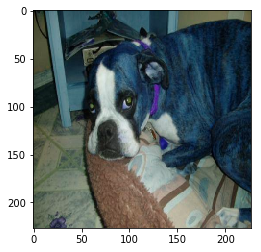

In [7]:
plt.imshow(test_data[0])

<p style="font-size:20px">Step 5: Reshape all images to have shape (#, 227, 227, 3). Use 500 training data as your validation set.

In [8]:
for i in range(len(train_data)):
    assert train_data[i][0].shape == (227, 227, 3)
    img_data = train_data[i][0]
    label = train_data[i][1]
    train_data[i] = (np.reshape(img_data, (-1, 227, 227, 3)), label)
    
for i in range(len(test_data)):
    assert test_data[i].shape == (227, 227, 3)
    img_data = test_data[i]
    test_data[i] = np.reshape(img_data, (-1, 227, 227, 3))

In [10]:
# shuffle(train_data)
shuffle(test_data)

val_data = train_data[:500]
final_train_data = train_data[500:]

assert len(val_data) + len(final_train_data) == len(train_data)
del(train_data)

<p style="font-size:20px">Step 6: Save training data, validation data and testing data as Pickle object</p>
<p style="font-size:20px">Note: You can't save all training data into one file because it has several Gigabytes. Separate your data wisely and save them into different files</p>

In [12]:
with open('/home/lkumari/data/dogs-vs-cats/new/q4_test_data', 'wb') as f1:
    pickle.dump(test_data, f1)
    
with open('/home/lkumari/data/dogs-vs-cats/new/q4_val_data', 'wb') as f2:
    pickle.dump(val_data, f2)
    
breaks = [x for x in range(0, len(final_train_data), 5000)]
breaks.append(len(final_train_data))
print (breaks)

for i in range(len(breaks)-1):
    train_part = final_train_data[breaks[i]:breaks[i+1]]
    with open('/home/lkumari/data/dogs-vs-cats/new/q4_train_data_' + str(i), 'wb') as f:
        pickle.dump(train_part, f)

[0, 5000, 10000, 15000, 20000, 24500]
